In [1]:
import numpy as np
import scipy.io.wavfile as wav
import matplotlib.pyplot as plt
from IPython.display import display, HTML
from tensorflow.keras.models import load_model

2024-02-14 20:02:53.414123: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-02-14 20:02:53.454750: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-14 20:02:54.051054: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
import os
import sys
import pathlib
current_dir = os.getcwd()
parent_dir = os.path.dirname(current_dir)
sys.path.append(parent_dir)
current_file_path = pathlib.Path(os.getcwd())
parent_dir = current_file_path.parent
import swallowing_recognition

In [3]:
from swallowing_recognition import wavelet
from swallowing_recognition import dataset
from swallowing_recognition import long_audio

In [4]:
# directory_path = parent_dir / '30min_data'
directory_path = parent_dir 

In [5]:
path = directory_path / '30min_data'/ 'washino20240205.wav'

163.84
552
[158246, 260452, 360619, 403613, 445095, 507570, 588853, 653896, 749946, 791317, 836271, 859125, 1003588, 1212002, 1284991, 1326701, 1867067, 1975433, 2088161, 2122015, 2281658, 2451973, 2497330, 2595474, 2623337, 2661587, 2728268, 2791480, 2818806, 2904025, 3041670, 3141582, 3168788, 3271951, 3322439, 3397483, 3524015, 3665909, 3714671, 3746430, 3814889, 3975211, 4132605, 4200916, 4341845, 4384635, 4492891, 4515874, 4562462, 4617095, 4676668, 4762712, 4831017, 4886357, 4984530, 5075146, 5148385, 5203918, 5246234, 5319364, 5374460, 5442210, 5479543, 5577910, 5702031, 5827400, 5858961, 5906749, 6001983, 6054316, 6231262, 6271780, 6422252, 6568731, 6757565, 6831266, 6853871, 6878851, 7009150, 7072559, 7113222, 7360330, 7441482, 7488728, 7536878, 7575933, 7620556, 7659696, 7770869, 7791211, 7804824, 7880449, 7926354, 7961601, 8005402, 8045613, 8085731, 8147942, 8194234, 8375512, 8425662, 8502573, 8533701, 8557122, 8643034, 8686670, 8721601, 8738773, 8824995, 8853084, 8927228, 8

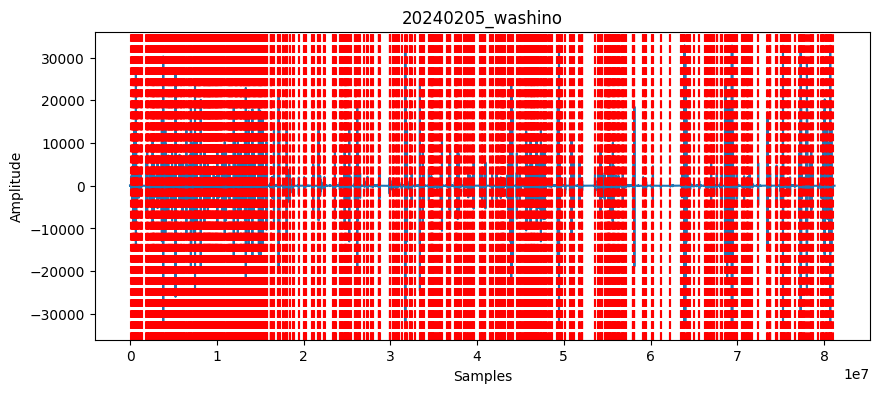

/home/s2/Desktop/washino


In [6]:
wav1 = long_audio.Long_audio(path)
wav1.print()
wav1.plot("20240205_washino")
current_path = path.parent.parent.parent
print(current_path)

In [7]:
current_path = directory_path
model_path = current_path / 'ipynb_swallowing' / '20240213_binary_ep70_bs32_v2.keras'
print(model_path)
wav1.predict(model_path, 2)

/home/s2/Desktop/washino/swallowing-recognize/ipynb_swallowing/20240213_binary_ep70_bs32_v2.keras


2024-02-14 20:06:20.208050: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22066 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:65:00.0, compute capability: 8.6


(552, 224, 224, 3)


2024-02-14 20:08:39.518216: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2024-02-14 20:08:39.824703: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


18/18 [==============================] - 3s 35ms/step
Predicted classes: [0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 0 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 0 0
 1 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0
 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 0 0 1
 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0
 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 1 0 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 1 1 0
 1 1 0 1 1 0 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1
 1 0 0 0 1 1 0 0 0 1 0 0 1 

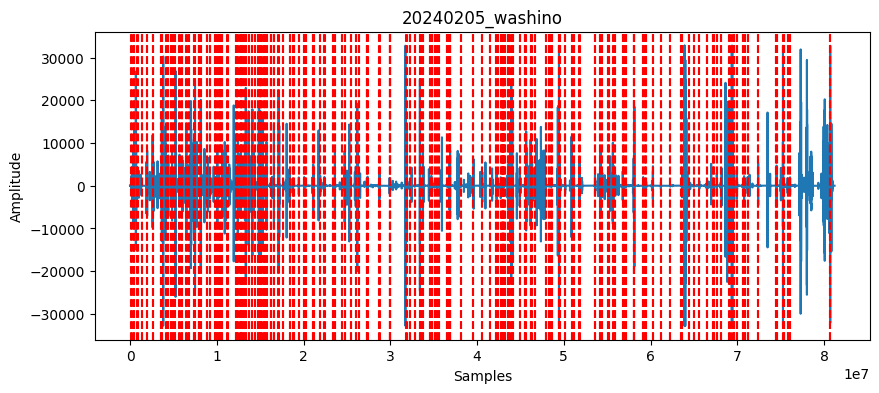

In [8]:
wav1.plot_predicted("20240205_washino")

In [9]:
wav1.save_png_swallowing_number_line('out.png')
wav1.display_HTML('out.png')

81210267


In [12]:
print(len(wav1.swallowing_start_idxs))
print(wav1.swallowing_start_idxs/44100)

169
[   3.58834467    9.15222222   19.48129252   30.0839229    44.79439909
   59.48609977   79.90963719   83.12718821   95.25886621   98.45453515
  106.04689342  113.02789116  116.74342404  129.2977551   136.09938776
  145.62929705  153.23276644  166.90090703  168.74108844  179.73591837
  180.53517007  184.76058957  200.11326531  208.03988662  222.12249433
  225.81056689  230.52358277  234.54006803  235.59274376  241.23680272
  254.34936508  276.03886621  278.98557823  279.92712018  288.6693424
  291.15548753  291.55408163  298.26825397  302.50634921  312.05909297
  319.32369615  325.57444444  335.05746032  338.77428571  340.91401361
  342.06020408  347.78027211  352.75650794  357.69108844  368.94800454
  369.47165533  375.79199546  387.69854875  400.26206349  416.94800454
  424.95598639  427.79823129  441.21789116  455.24575964  458.30133787
  461.01614512  478.9507483   480.54442177  497.08995465  508.10496599
  530.98897959  535.51442177  554.41283447  560.69657596  576.49993197
  5

In [7]:
wav1.save_plots_to_pdf('20240205washino\30min.pdf')